In [ ]:
!pip install h5py


In [9]:
# Montar Google Drive (asegúrate de ejecutar esto una vez)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Listar archivos en el directorio de tu Google Drive
drive_path = '/content/drive/MyDrive/'  # Cambia esto a la carpeta donde crees que está el modelo
for root, dirs, files in os.walk(drive_path):
    for file in files:
        print(os.path.join(root, file))


Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/drive/MyDrive/Cars/Cars/13438.jpg
/content/drive/MyDrive/Cars/Cars/1350.jpg
/content/drive/MyDrive/Cars/Cars/13416.jpg
/content/drive/MyDrive/Cars/Cars/1346.jpg
/content/drive/MyDrive/Cars/Cars/13526.jpg
/content/drive/MyDrive/Cars/Cars/1354.jpg
/content/drive/MyDrive/Cars/Cars/13476.jpg
/content/drive/MyDrive/Cars/Cars/13550.jpg
/content/drive/MyDrive/Cars/Cars/13514.jpg
/content/drive/MyDrive/Cars/Cars/13475.jpg
/content/drive/MyDrive/Cars/Cars/13497.jpg
/content/drive/MyDrive/Cars/Cars/13491.jpg
/content/drive/MyDrive/Cars/Cars/13473.jpg
/content/drive/MyDrive/Cars/Cars/13490.jpg
/content/drive/MyDrive/Cars/Cars/13468.jpg
/content/drive/MyDrive/Cars/Cars/13479.jpg
/content/drive/MyDrive/Cars/Cars/13443.jpg
/content/drive/MyDrive/Cars/Cars/13686.jpg
/content/drive/MyDrive/Cars/Cars/13483.jpg
/content/drive/MyDrive/Cars/Cars/13485.jpg
/content/drive/MyDrive/Cars/Cars/13460.jpg
/content/drive/MyDrive/Cars/Cars/

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import files

# Cargar el archivo preprocesado desde Google Drive
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# TensorBoard
tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Excluye la columna objetivo
    y = df['RENDIMIENTO_GLOBAL']  # La columna objetivo

    print("Tipos de datos de las características:")
    print(X.dtypes)

    print("Tipos de datos de las etiquetas:")
    print(y.dtype)

    print("Valores únicos en la etiqueta y:")
    print(y.unique())

except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = to_categorical(y, num_classes=4)  # 4 clases: medio-alto, bajo, alto, medio-bajo

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Imprimir tipos de datos después de la conversión
print("Tipos de datos de las características después de la conversión:")
print(X.dtypes)

# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Definir la entrada
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 clases para clasificación multiclase

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=1)

# Guardar el modelo final en formato .h5
model.save("modelo_final.h5")

# Mostrar la precisión final
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")

# Graficar el historial de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


Tipos de datos de las características:
ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMADRE               object
ESTU_PAGOMATRICULAPROPIO          object
dtype: object
Tipos de datos de las etiquetas:
object
Valores únicos en la etiqueta y:
['medio-alto' 'bajo' 'alto' 'medio-bajo']
Tipos de datos de las características después de la conversión:
ID                                                          int64
PERIODO                                                     int64
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE               bool
ESTU_PRGM_ACADEMICO_ACUICULTURA                              bool
ESTU_PRGM_ACADEMICO_ADMINISTRACION                   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         130,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,156 (551.39 KB)

 Trainable params: 141,156 (551.39 KB)

 Non-trainable params: 0 (0.00 B)

Tipos de datos de las características (X):
ID                                                          float32
PERIODO                                                     float32
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE              float32
ESTU_PRGM_ACADEMICO_ACUICULTURA                             float32
ESTU_PRGM_ACADEMICO_ADMINISTRACION                          float32
                                                             ...   
FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa      float32
FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta    float32
FAMI_EDUCACIONMADRE_Técnica o tecnológica completa          float32
FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta        float32
ESTU_PAGOMATRICULAPROPIO_Si                                 float32
Length: 930, dtype: object
Tipos de datos en X_train:
ID                                                          float32
PERIODO                                                     float32
ESTU_PRGM_ACADEMICO

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          59,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,796 (241.39 KB)

 Trainable params: 61,796 (241.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6914/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 426.5023
Epoch 1: val_accuracy improved from -inf to 0.24007, saving model to modelo_entrenado.keras
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.2490 - loss: 426.1414 - val_accuracy: 0.2401 - val_loss: 72.9648
Epoch 2/50
6904/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2510 - loss: 15.7142
Epoch 2: val_accuracy improved from 0.24007 to 0.25134, saving model to modelo_entrenado.keras
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.2510 - loss: 15.6824 - val_accuracy: 0.2513 - val_loss: 1.3864
Epoch 3/50
6916/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 1.3864
Epoch 3: val_accuracy did not improve from 0.25134
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.2525 - loss: 1.3864 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 4/50
6914/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 1.3864
Epoch 4: val_accuracy did not improve from 

Precisión en los datos de prueba: 25.00%


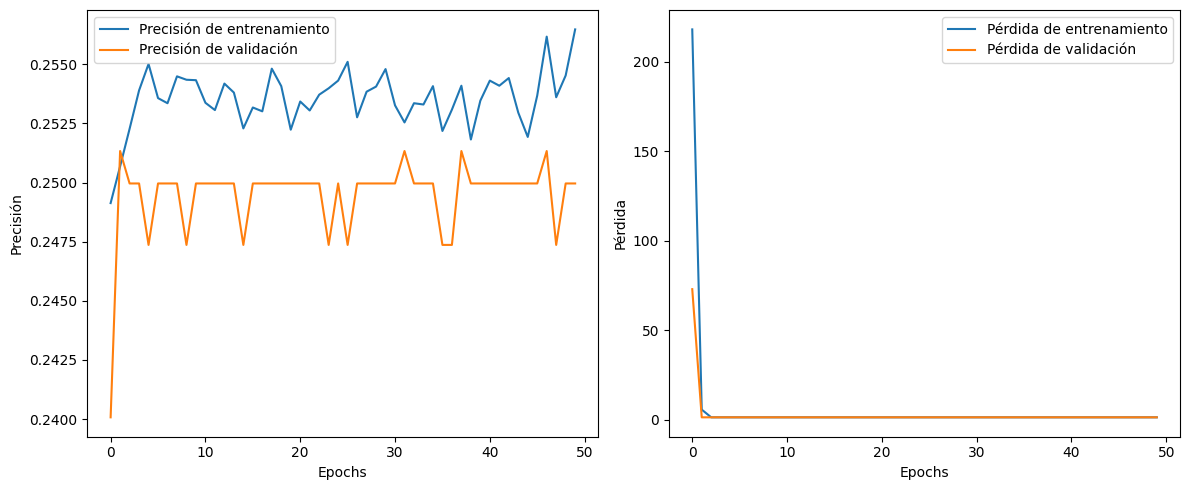

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Excluye la columna objetivo
    y = df['RENDIMIENTO_GLOBAL']  # La columna objetivo
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)  # Asegúrate de que sea float

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')  # Convertir X a float32
print("Tipos de datos de las características (X):")
print(X.dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobar tipos de datos
print(f"Tipos de datos en X_train:\n{X_train.dtypes}")
print(f"Tipo de datos en y_train: {y_train.dtype}")

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))  # Reduce a 64 neuronas
model.add(Dense(32, activation='relu'))  # Reduce a 32 neuronas
model.add(Dense(4, activation='softmax'))  # 4 clases para clasificación multiclase

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=1)
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Guardar el modelo final en formato .h5
model.save("modelo_final.h5")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()



Tipos de datos de las características (X):
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object
Tipos de datos en X_train:
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object
Tipo de datos en y_train: float64


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         119,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,684 (498.77 KB)

 Trainable params: 127,684 (498.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6920/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3079 - loss: 1.5354
Epoch 1: val_accuracy improved from -inf to 0.39567, saving model to modelo_entrenado.keras
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.3080 - loss: 1.5353 - val_accuracy: 0.3957 - val_loss: 1.2762
Epoch 2/50
6920/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 1.3040
Epoch 2: val_accuracy improved from 0.39567 to 0.40801, saving model to modelo_entrenado.keras
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.3960 - loss: 1.3040 - val_accuracy: 0.4080 - val_loss: 1.2489
Epoch 3/50
6916/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4112 - loss: 1.2638
Epoch 3: val_accuracy improved from 0.40801 to 0.41473, saving model to modelo_entrenado.keras
6925/6925 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.4112 - loss: 1.2638 - val_accuracy: 0.4147 - val_loss: 1.2391
Epoch 4/50
6922/6925 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4114 - loss: 1.2502
Epoch 

Precisión en los datos de prueba: 41.91%


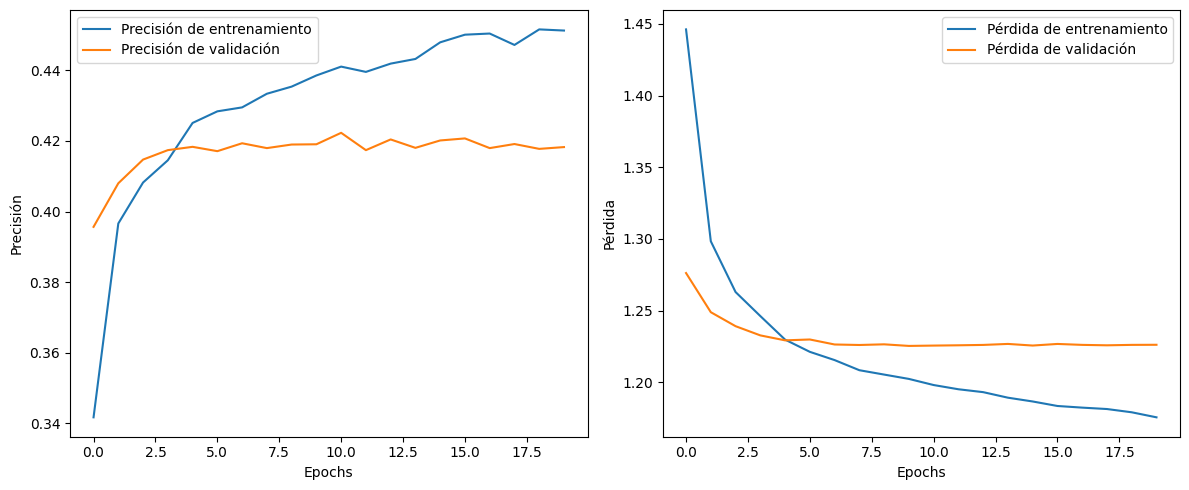

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam  # Importar Adam
import matplotlib.pyplot as plt

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Excluye la columna objetivo
    y = df['RENDIMIENTO_GLOBAL']  # La columna objetivo
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)  # Asegúrate de que sea float

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normaliza las características

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')  # Convertir X a float
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobar tipos de datos
print(f"Tipos de datos en X_train:\n{pd.DataFrame(X_train).dtypes}")
print(f"Tipo de datos en y_train: {y_train.dtype}")

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))  # Más neuronas
model.add(Dropout(0.5))  # Regularización
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 clases para clasificación multiclase

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.0001)  # Ahora está importado
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Guardar el modelo final en formato .h5
model.save("modeloo_final.h5")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Tipos de datos de las características (X):
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │         238,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,748 (1.04 MB)

 Trainable params: 271,748 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3459/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2600 - loss: 2.0154
Epoch 1: val_accuracy improved from -inf to 0.31314, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.2601 - loss: 2.0153 - val_accuracy: 0.3131 - val_loss: 1.4472
Epoch 2/100
3448/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2790 - loss: 1.7933
Epoch 2: val_accuracy improved from 0.31314 to 0.34491, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2790 - loss: 1.7932 - val_accuracy: 0.3449 - val_loss: 1.4000
Epoch 3/100
3448/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2886 - loss: 1.6982
Epoch 3: val_accuracy improved from 0.34491 to 0.35928, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2886 - loss: 1.6981 - val_accuracy: 0.3593 - val_loss: 1.3733
Epoch 4/100
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3075 - loss: 1.5859
Ep

Precisión en los datos de prueba: 42.22%


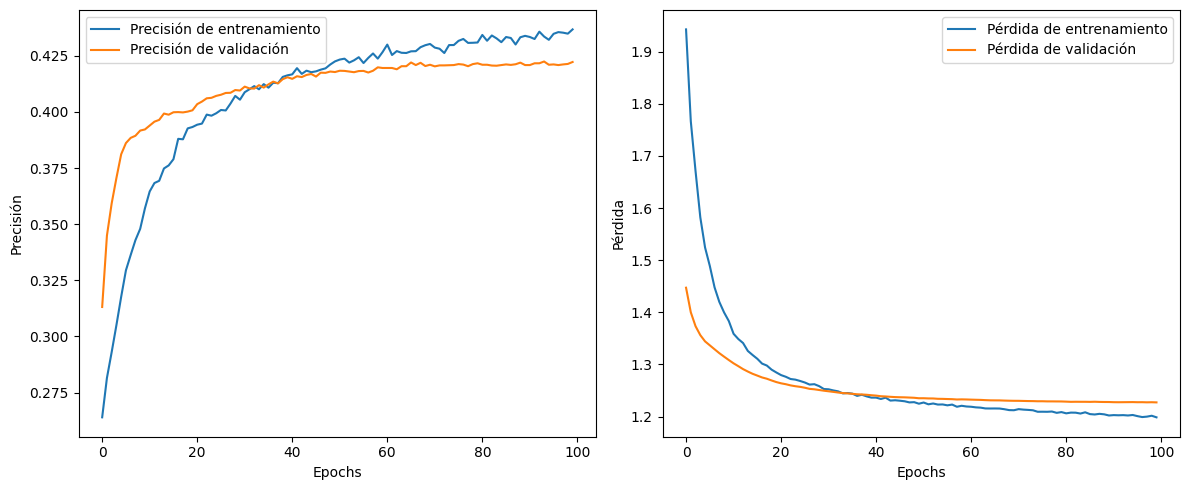

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
    y = df['RENDIMIENTO_GLOBAL']
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))  # Aumenta a 256 neuronas
model.add(Dropout(0.5))  # Regularización
model.add(Dense(128, activation='relu'))  # Agrega una capa adicional
model.add(Dropout(0.5))  # Regularización
model.add(Dense(4, activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.00001)  # Prueba una tasa de aprendizaje más baja
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)  # Aumentar epochs
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Guardar el modelo final en formato .h5
model.save("modeelo_final.h5")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Tipos de datos de las características (X):
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         238,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,748 (1.04 MB)

 Trainable params: 271,748 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3461/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2536 - loss: 2.0259
Epoch 1: val_accuracy improved from -inf to 0.30051, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.2536 - loss: 2.0259 - val_accuracy: 0.3005 - val_loss: 1.4597
Epoch 2/100
3459/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2707 - loss: 1.8211
Epoch 2: val_accuracy improved from 0.30051 to 0.33928, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.2707 - loss: 1.8210 - val_accuracy: 0.3393 - val_loss: 1.4124
Epoch 3/100
3457/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2886 - loss: 1.6840
Epoch 3: val_accuracy improved from 0.33928 to 0.35791, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.2886 - loss: 1.6840 - val_accuracy: 0.3579 - val_loss: 1.3822
Epoch 4/100
3461/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3045 - loss: 1.5822
Ep

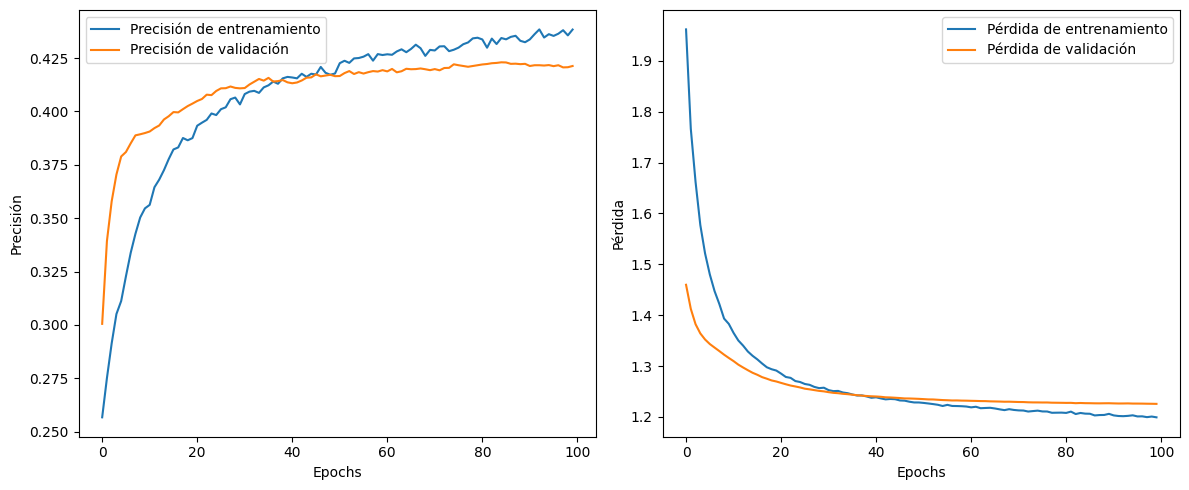

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
    y = df['RENDIMIENTO_GLOBAL']
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))  # Aumenta a 256 neuronas
model.add(Dropout(0.5))  # Regularización
model.add(Dense(128, activation='relu'))  # Agrega una capa adicional
model.add(Dropout(0.5))  # Regularización
model.add(Dense(4, activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.00001)  # Prueba una tasa de aprendizaje más baja
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)  # Aumentar epochs
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convertir las predicciones a etiquetas
predicted_labels = predictions.argmax(axis=1)

# Crear un DataFrame para las predicciones con las columnas adecuadas
submission_df = pd.DataFrame({
    'Id': range(1, len(predicted_labels) + 1),  # Si tienes un ID específico úsalo, aquí se usa un rango
    'Predicted': predicted_labels
})

# Guardar el DataFrame en un archivo CSV
csv_output_path = '/content/predicciones.csv'
submission_df.to_csv(csv_output_path, index=False)

# Comprimir el archivo CSV si lo necesitas
import shutil
shutil.make_archive('/content/predicciones', 'zip', '/content', 'predicciones.csv')

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
    y = df['RENDIMIENTO_GLOBAL']
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo con más regularización y BatchNormalization
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Aumenta a 256 neuronas con regularización L2
model.add(BatchNormalization())  # Normalización
model.add(Dropout(0.5))  # Regularización adicional
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Capa con L2
model.add(BatchNormalization())  # Normalización
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Capa de salida

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping con menor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convertir las predicciones a etiquetas
predicted_labels = predictions.argmax(axis=1)

# Crear un DataFrame para las predicciones con las columnas adecuadas
submission_df = pd.DataFrame({
    'Id': range(1, len(predicted_labels) + 1),
    'Predicted': predicted_labels
})

# Guardar el DataFrame en un archivo CSV
csv_output_path = '/content/predicciones.csv'
submission_df.to_csv(csv_output_path, index=False)

# Comprimir el archivo CSV si lo necesitas
import shutil
shutil.make_archive('/content/predicciones', 'zip', '/content', 'predicciones.csv')

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Tipos de datos de las características (X):
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         238,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273,284 (1.04 MB)

 Trainable params: 272,516 (1.04 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
3456/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2547 - loss: 7.4035
Epoch 1: val_accuracy improved from -inf to 0.29661, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.2547 - loss: 7.4023 - val_accuracy: 0.2966 - val_loss: 5.4480
Epoch 2/100
3460/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2660 - loss: 5.8561
Epoch 2: val_accuracy improved from 0.29661 to 0.32606, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.2660 - loss: 5.8559 - val_accuracy: 0.3261 - val_loss: 4.7685
Epoch 3/100
3457/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2817 - loss: 5.2383
Epoch 3: val_accuracy improved from 0.32606 to 0.34202, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.2817 - loss: 5.2381 - val_accuracy: 0.3420 - val_loss: 4.4756
Epoch 4/100
3462/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2864 - loss: 4.9165
Ep

KeyboardInterrupt: 

Tipos de datos de las características (X):
0      float32
1      float32
2      float32
3      float32
4      float32
        ...   
925    float32
926    float32
927    float32
928    float32
929    float32
Length: 930, dtype: object


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │         238,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,748 (1.04 MB)

 Trainable params: 271,748 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3452/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2523 - loss: 2.0191
Epoch 1: val_accuracy improved from -inf to 0.29791, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.2523 - loss: 2.0188 - val_accuracy: 0.2979 - val_loss: 1.4631
Epoch 2/100
3457/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2703 - loss: 1.8236
Epoch 2: val_accuracy improved from 0.29791 to 0.32953, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.2703 - loss: 1.8236 - val_accuracy: 0.3295 - val_loss: 1.4126
Epoch 3/100
3461/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2928 - loss: 1.6852
Epoch 3: val_accuracy improved from 0.32953 to 0.34671, saving model to modelo_entrenado.keras
3463/3463 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.2928 - loss: 1.6852 - val_accuracy: 0.3467 - val_loss: 1.3855
Epoch 4/100
3453/3463 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3047 - loss: 1.6020
Ep

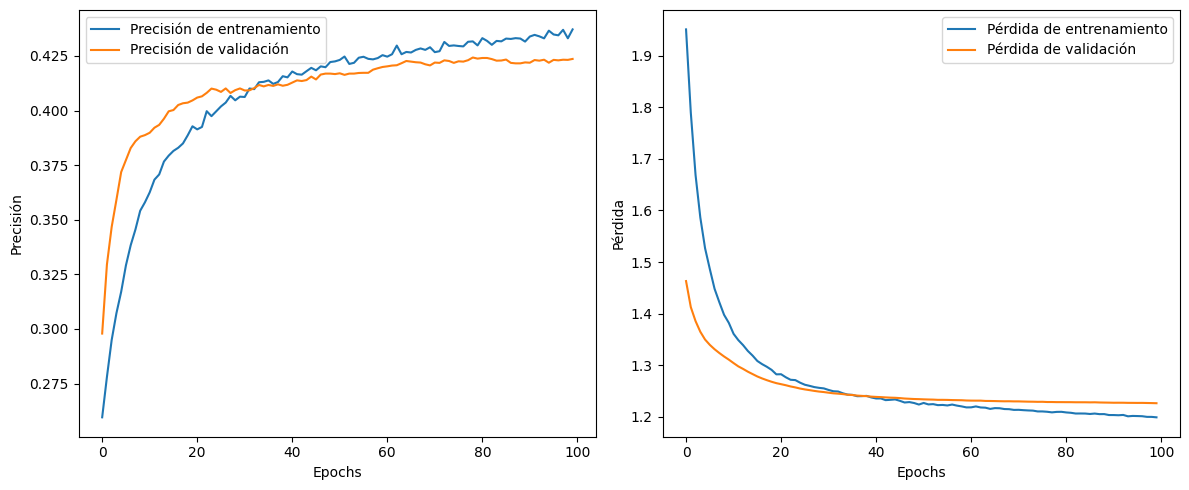

In [10]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import shutil

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
    y = df['RENDIMIENTO_GLOBAL']
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Asegurarse de que los tipos de datos sean correctos
X = X.astype('float32')
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))  # Aumenta a 256 neuronas
model.add(Dropout(0.5))  # Regularización
model.add(Dense(128, activation='relu'))  # Agrega una capa adicional
model.add(Dropout(0.5))  # Regularización
model.add(Dense(4, activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.00001)  # Prueba una tasa de aprendizaje más baja
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)  # Aumentar epochs
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convertir las predicciones a etiquetas
predicted_labels = predictions.argmax(axis=1)

# Crear un DataFrame para las predicciones con las columnas adecuadas
submission_df = pd.DataFrame({
    'ID': range(1, len(predicted_labels) + 1),  # Cambiar 'Id' a 'ID' como espera Kaggle
    'Predicted': predicted_labels
})

# Guardar el DataFrame en un archivo CSV
csv_output_path = '/content/prediccioness.csv'
submission_df.to_csv(csv_output_path, index=False)

# Comprimir el archivo CSV si lo necesitas
shutil.make_archive('/content/prediccioness', 'zip', '/content', 'predicciones.csv')

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import shutil
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Cargar el archivo preprocesado
preprocessed_path = "/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv"
df = pd.read_csv(preprocessed_path)

# Imputación de valores nulos
print("Valores nulos por columna antes de imputación:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')  # Cambia la estrategia según sea necesario
df[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO']] = imputer.fit_transform(df[['ESTU_VALORMATRICULAUNIVERSIDAD',
                                                              'ESTU_HORASSEMANATRABAJA',
                                                              'FAMI_ESTRATOVIVIENDA',
                                                              'FAMI_TIENEINTERNET',
                                                              'FAMI_EDUCACIONPADRE',
                                                              'FAMI_EDUCACIONMADRE',
                                                              'ESTU_PAGOMATRICULAPROPIO']])

print("Valores nulos por columna después de imputación:")
print(df.isnull().sum())

# Tomar una muestra del 10% del conjunto de datos
df = df.sample(frac=0.1, random_state=42)

# Dividir en características (X) y etiqueta (y)
try:
    X = df.drop('RENDIMIENTO_GLOBAL', axis=1)
    y = df['RENDIMIENTO_GLOBAL']
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    exit()

# Convertir y a numérico si es necesario
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convertir y a categórico y asegurar que sea float
y = to_categorical(y.astype('float32'), num_classes=4)

# Convertir variables categóricas en X a numéricas
X = pd.get_dummies(X, drop_first=True)

# Balancear clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalización
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Asegurarse de que los tipos de datos sean correctos
X_resampled = X_resampled.astype('float32')
print("Tipos de datos de las características (X):")
print(pd.DataFrame(X_resampled).dtypes)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))  # Aumenta a 256 neuronas
model.add(Dropout(0.5))  # Regularización
model.add(Dense(128, activation='relu'))  # Agrega una capa adicional
model.add(Dropout(0.5))  # Regularización
model.add(Dense(y_train.shape[1], activation='softmax'))  # Cambia según la cantidad de clases

# Compilar el modelo con una tasa de aprendizaje menor
optimizer = Adam(learning_rate=0.00001)  # Prueba una tasa de aprendizaje más baja
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir un callback para guardar el mejor modelo en cada epoch
checkpoint_path = "modelo_entrenado.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
try:
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[checkpoint, early_stopping], verbose=1)  # Aumentar epochs
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

# Mostrar la precisión final
try:
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en los datos de prueba: {scores[1] * 100:.2f}%")
except Exception as e:
    print(f"Error al evaluar el modelo: {e}")

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convertir las predicciones a etiquetas
predicted_labels = predictions.argmax(axis=1)

# Crear un DataFrame para las predicciones con las columnas adecuadas
submission_df = pd.DataFrame({
    'ID': range(1, len(predicted_labels) + 1),  # Cambiar 'Id' a 'ID' como espera Kaggle
    'Predicted': predicted_labels
})

# Guardar el DataFrame en un archivo CSV
csv_output_path = '/content/ppredicciones.csv'
submission_df.to_csv(csv_output_path, index=False)

# Comprimir el archivo CSV si lo necesitas
shutil.make_archive('/content/ppredicciones', 'zip', '/content', 'predicciones.csv')

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Valores nulos por columna antes de imputación:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Entre 5.5 millones y menos de 7 millones'